# Ruina gracza
Proszę zasymulować proces ruiny gracza z łącznymi kapitałami początkowymi a = b = 50.

Dla trzech różnych wartości p = 1/5, 1/2, 4/5 proszę wyznaczyć rozkład prawdopodobieństwa długości trwania rozgrywki (czyli ruiny dowolnego gracza) P(L).

Z tego rozkładu proszę wyznaczyć średnią i jej odchylenie standardowe.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def single_game(a_fortune, b_fortune, p):
    duration = 0
    while a_fortune > 0 and b_fortune > 0:
        duration += 1
        a_status = np.random.uniform(0, 1) < p
        a_fortune += 1 if a_status else -1
        b_fortune += -1 if a_status else 1 
    return duration

In [3]:
def simulation(game_num, a_fortune, b_fortune, p):
    durations = []
    for _ in range(game_num):
        durations.append(single_game(a_fortune, b_fortune, p))
    return durations

In [4]:
def draw_histogram(p):
    game_num = 10000
    a_init_fortune = 50
    b_init_fortune = 50
    
    durations = simulation(game_num, a_init_fortune, b_init_fortune, p)
    mean = np.mean(durations)
    std = np.std(durations)
    print(f"Średnia: [{mean}], odchylenie standardowe: [{std}]")
    
    bin_width = (3.49 * std) / (np.cbrt(game_num))
    bins_num = int((np.max(durations) - np.min(durations)) / bin_width)
    
    plt.figure(figsize=(8,5))
    plt.hist(durations, bins=bins_num, density=True)

    plt.title(f'Histogram for game duration given p = {p}')
    plt.xlabel('Game duration L')
    plt.ylabel('P(L)')
    plt.show()

### p = 1/5

Średnia: [83.505], odchylenie standardowe: [12.266383941488217]


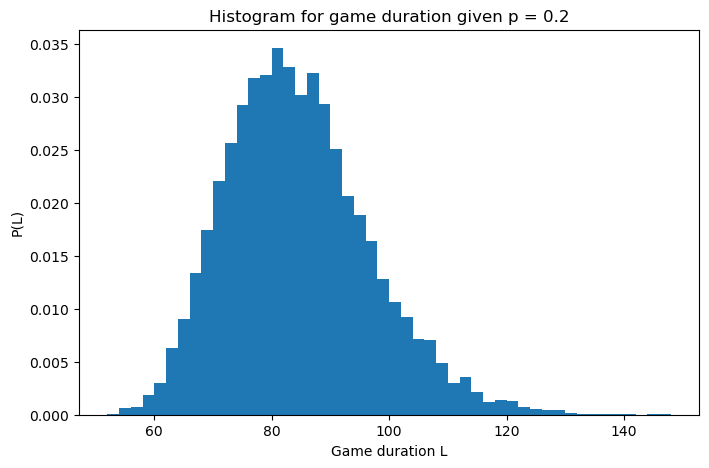

In [5]:
draw_histogram(1/5)

### p = 1/2

Średnia: [2513.918], odchylenie standardowe: [2076.2140008380643]


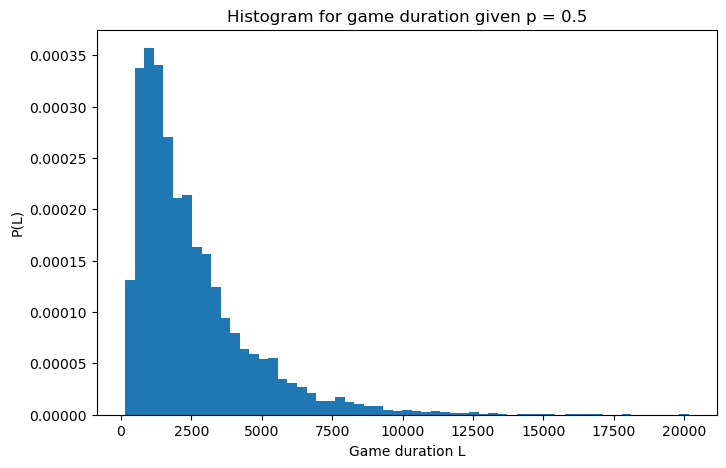

In [6]:
draw_histogram(1/2)

### p = 4/5

Średnia: [83.2008], odchylenie standardowe: [12.199396680164146]


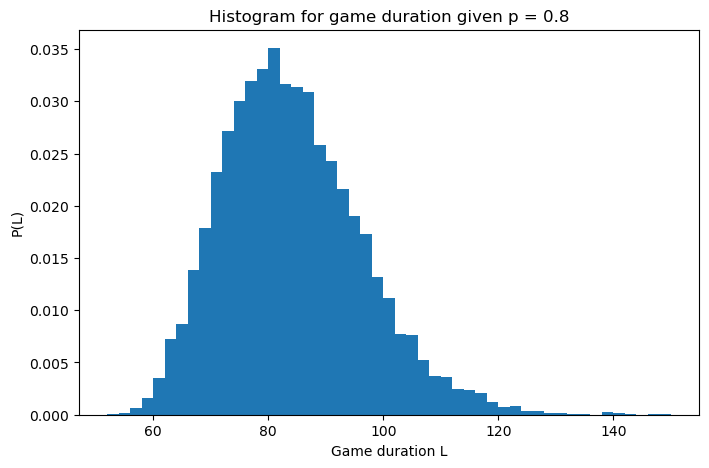

In [7]:
draw_histogram(4/5)